<!--BOOK_INFORMATION-->
<img align="left" src="" style="width: 76px; height: 100px; background: gray; padding-right:10px;">
*This notebook contains an excerpt from the upcoming book Machine Learning for OpenCV by Michael Beyeler. The content is available [on GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*The code is released under the [MIT license](https://opensource.org/licenses/MIT). This excerpt contains only the raw code - the book is rich with additional explanations and illustrations. If you find this content useful, please consider supporting the work by [buying the book](https://github.com/mbeyeler/opencv-machine-learning)!*

<!--NAVIGATION-->
< [# Scoring classifiers using accuracy, precision, and recall](03.00-First-Steps-in-Supervised-Learning.ipynb) | [Contents](../README.md) | [Logistic Regression](03.02-Logistic-Regression.ipynb) >

# The k-Nearest Neighbor Classifier

Using OpenCV, we can easily create a k-NN model via the function cv2.ml.KNearest_create(). Building the model then involves the following steps:
- Generate some training data.
- Create a k-NN object for a given number k.
- Find the k nearest neighbors of a new data point that we want to classify.
- Assign the class label of the new data point by majority vote.
- Plot the result.

In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
np.random.seed(42)

### Generating the training data

Pick a single data point with `0 <= x <= 100` and `0 <= y <= 100`:

In [4]:
single_data_point = np.random.randint(0, 100, 2)
single_data_point

array([51, 92])

Assign a random label, either 0 or 1:

In [5]:
single_label = np.random.randint(0, 2)
single_label

0

Wrap the above in a function that can generate data:

In [6]:
def generate_data(num_samples, num_features=2):
    """Randomly generates a number of data points"""
    data_size = (num_samples, num_features)
    train_data = np.random.randint(0, 100, size=data_size)
    labels_size = (num_samples, 1)
    labels = np.random.randint(0, 2, size=labels_size)
    
    return train_data.astype(np.float32), labels

Use the function to generate a training set:

In [7]:
train_data, labels = generate_data(11)
train_data

array([[ 71.,  60.],
       [ 20.,  82.],
       [ 86.,  74.],
       [ 74.,  87.],
       [ 99.,  23.],
       [  2.,  21.],
       [ 52.,   1.],
       [ 87.,  29.],
       [ 37.,   1.],
       [ 63.,  59.],
       [ 20.,  32.]], dtype=float32)

Inspect the first data point:

In [8]:
train_data[0], labels[0]

(array([ 71.,  60.], dtype=float32), array([1]))

Visualize the data point:

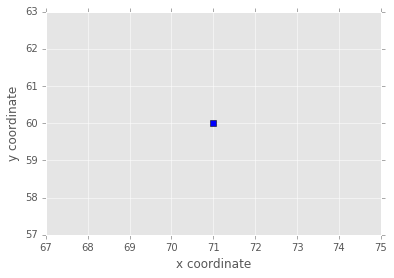

In [9]:
plt.plot(train_data[0, 0], train_data[0, 1], 'sb')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.savefig('plot_single.png')

Write a function that can visualize all data points:

In [10]:
def plot_data(all_blue, all_red):
    plt.figure(figsize=(10, 6))
    plt.scatter(all_blue[:, 0], all_blue[:, 1], c='b', marker='s', s=180)
    plt.scatter(all_red[:, 0], all_red[:, 1], c='r', marker='^', s=180)
    plt.xlabel('x coordinate (feature 1)')
    plt.ylabel('y coordinate (feature 2)')

Split the data into blues and reds:

In [11]:
labels.ravel() == 0

array([False, False, False,  True, False,  True,  True,  True,  True,
        True, False], dtype=bool)

In [12]:
blue = train_data[labels.ravel() == 0]

In [13]:
red = train_data[labels.ravel() == 1]

Plot the data:

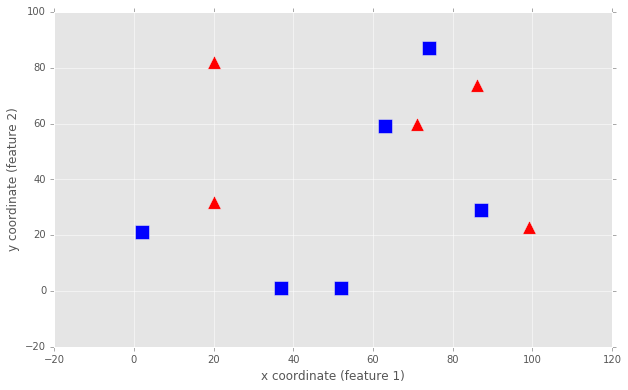

In [14]:
plot_data(blue, red)
plt.savefig('plot_data.png')

### Training the classifier

As all other machine learning functions, the k-NN classifier is part of OpenCV 3.1's ml module. You can create a new classifier using the following command:

In [15]:
knn = cv2.ml.KNearest_create()

We then simply pass our training data to the train method:

In [16]:
knn.train(train_data, cv2.ml.ROW_SAMPLE, labels)

True

In [17]:
newcomer, _ = generate_data(1)
newcomer

array([[ 91.,  59.]], dtype=float32)

What about a new data point?

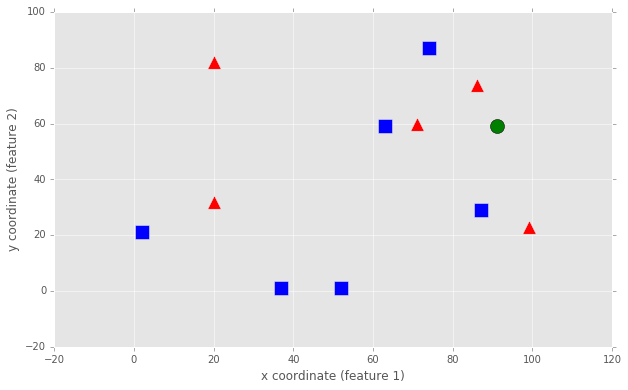

In [18]:
plot_data(blue, red)
plt.plot(newcomer[0, 0], newcomer[0, 1], 'go', markersize=14)

Predicting the label of the new data point using `k=1`:

In [19]:
ret, results, neighbor, dist = knn.findNearest(newcomer, 1)
print("Predicted label:\t", results)
print("Neighbor's label:\t", neighbor)
print("Distance to neighbor:\t", dist)

Predicted label:	 [[ 1.]]
Neighbor's label:	 [[ 1.]]
Distance to neighbor:	 [[ 250.]]


Predicting the label of the new data point using `k=7`:

In [20]:
ret, results, neighbor, dist = knn.findNearest(newcomer, 7)
print("Predicted label:\t", results)
print("Neighbor's label:\t", neighbor)
print("Distance to neighbor:\t", dist)

Predicted label:	 [[ 0.]]
Neighbor's label:	 [[ 1.  1.  0.  0.  0.  1.  0.]]
Distance to neighbor:	 [[  250.   401.   784.   916.  1073.  1360.  4885.]]


Predicting the label of the new data point using `k=7` (careful, there's a tie!)

In [21]:
ret, results, neighbors, dist = knn.findNearest(newcomer, 6)
print("Predicted label:\t", results)
print("Neighbors' labels:\t", neighbors)
print("Distance to neighbors:\t", dist)

Predicted label:	 [[ 0.]]
Neighbors' labels:	 [[ 1.  1.  0.  0.  0.  1.]]
Distance to neighbors:	 [[  250.   401.   784.   916.  1073.  1360.]]


Alternatively, predictions can be made with the `predict` method. But first, need to set `k`:

In [22]:
knn.setDefaultK(7)
knn.predict(newcomer)

(0.0, array([[ 0.]], dtype=float32))

In [23]:
knn.setDefaultK(6)
knn.predict(newcomer)

(0.0, array([[ 0.]], dtype=float32))

<!--NAVIGATION-->
< [# Scoring classifiers using accuracy, precision, and recall](03.00-First-Steps-in-Supervised-Learning.ipynb) | [Contents](../README.md) | [Logistic Regression](03.02-Logistic-Regression.ipynb) >